#### Visualization

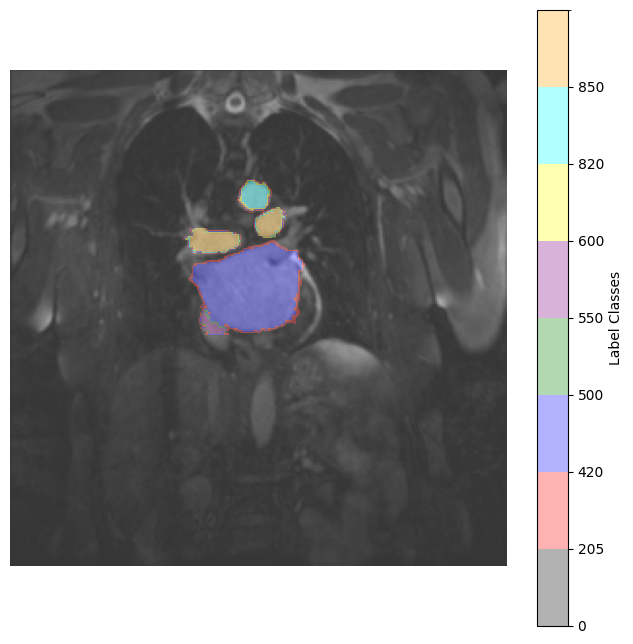

In [20]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Paths to the image and label files
image_file_path = 'data/mr_train_resized/mr_train_1012_image.nii.gz'
label_file_path = 'data/mr_train_resized/mr_train_1012_label.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

# Choose a slice to visualize (e.g., middle slice along the z-axis)
slice_index = image_data.shape[2] // 2
image_slice = image_data[:, :, slice_index]
label_slice = label_data[:, :, slice_index]

# Define specific label values and corresponding colors
label_values = [0, 205, 420, 500, 550, 600, 820, 850]
colors = ['black', 'red', 'blue', 'green', 'purple', 'yellow', 'cyan', 'orange']

# Create a color map for the labels with the specific values
cmap = mcolors.ListedColormap(colors)
bounds = label_values + [max(label_values) + 1]  # Add an upper bound for normalization
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the image slice
plt.figure(figsize=(8, 8))
plt.imshow(image_slice.T, cmap='gray', origin='lower', alpha=0.7)

# Overlay the label slice with the custom colormap and boundaries
plt.imshow(label_slice.T, cmap=cmap, norm=norm, origin='lower', alpha=0.3)

# Add a color bar with custom tick labels for the classes
colorbar = plt.colorbar(ticks=label_values)
colorbar.set_label('Label Classes')

# Remove axis for a cleaner view
plt.axis('off')
plt.show()



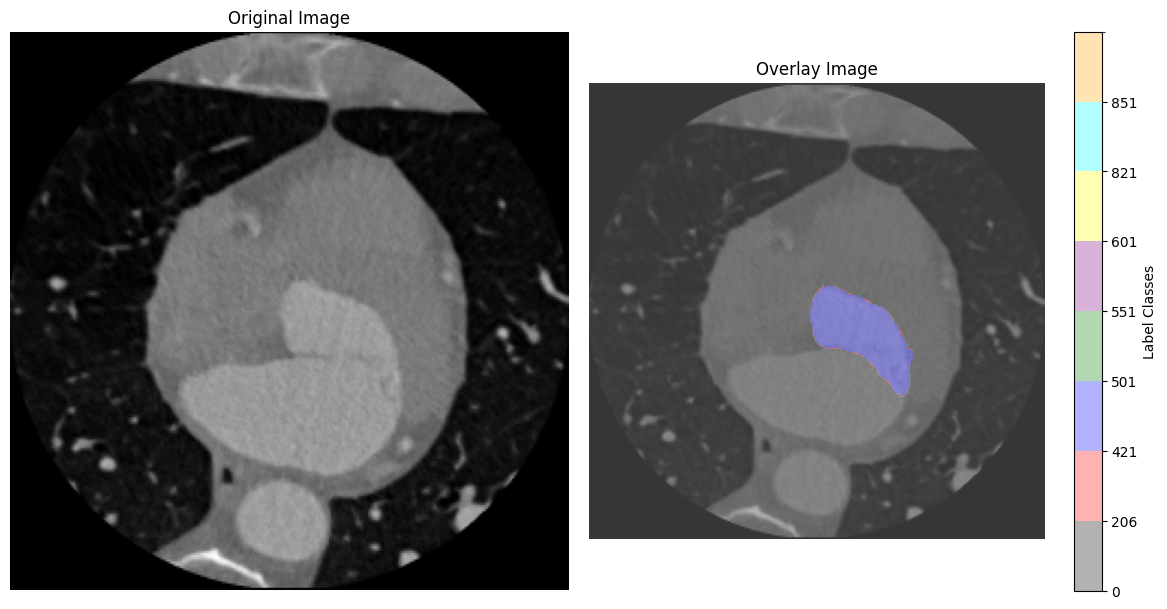

In [14]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Paths to the image and label files
image_file_path = 'data/ct_train_resized/ct_train_1014_image.nii.gz'
label_file_path = 'data/ct_train_lvc/ct_train_1014_label.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

# Choose a slice to visualize (e.g., middle slice along the z-axis)
slice_index = image_data.shape[2] // 2
image_slice = image_data[:, :, slice_index]
label_slice = label_data[:, :, slice_index]
# label_slice = np.round(label_slice)

# Define specific label values and corresponding colors
label_values = [0, 205, 420, 500, 550, 600, 820, 850]
label_values = [0, 206, 421, 501, 551, 601, 821, 851]
colors = ['black', 'red', 'blue', 'green', 'purple', 'yellow', 'cyan', 'orange']

# Create a color map for the labels with the specific values
cmap = mcolors.ListedColormap(colors)
bounds = label_values + [max(label_values) + 1]  # Add an upper bound for normalization
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a two-panel figure
plt.figure(figsize=(12, 6))

# Plot the original image slice on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower')
plt.title('Original Image')
plt.axis('off')  # Remove axis for a cleaner view

# Plot the overlay image on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower', alpha=0.7)
plt.imshow(label_slice.T, cmap=cmap, norm=norm, origin='lower', alpha=0.3)
plt.title('Overlay Image')
colorbar = plt.colorbar(ticks=label_values)
colorbar.set_label('Label Classes')
plt.axis('off')  # Remove axis for a cleaner view

plt.tight_layout()  # Adjust layout
plt.show()


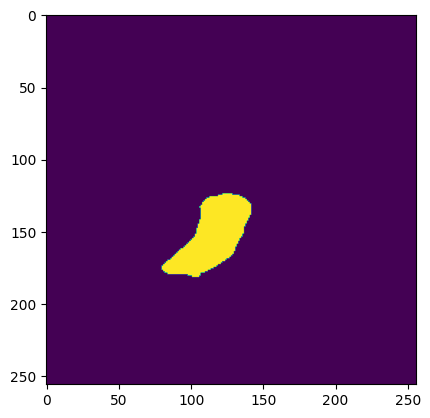

In [16]:
plt.imshow(label_slice)

#### Resize data to same size (256, 256)

In [3]:
import os
import nibabel as nib
import cv2
import numpy as np

# Define the target size for resizing
target_size = (256, 256)  # Update to your preferred dimensions

# Define the input and output directories
input_folder = 'data/mr_train'  # Update with the path to your input files
output_folder = 'data/mr_train_resized_nearest'  # Update with the path to your output folder

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to resize a single 2D slice
def resize_image(image, target_size):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_NEAREST)

# Process each .nii.gz file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.nii.gz'):
        file_path = os.path.join(input_folder, filename)
        
        # Load the NIfTI file
        img = nib.load(file_path)
        img_data = img.get_fdata()
        
        # Array to store resized slices
        resized_data = np.zeros((target_size[0], target_size[1], img_data.shape[2]))
        
        # Resize each slice and add it to the resized array
        for i in range(img_data.shape[2]):
            img_slice = img_data[:, :, i]
            
            # Resize the slice to target size
            resized_slice = resize_image(img_slice, target_size)
            resized_data[:, :, i] = resized_slice
        
        # Save the resized volume as a new NIfTI file in the output folder
        resized_img = nib.Nifti1Image(resized_data, img.affine, img.header)
        output_path = os.path.join(output_folder, filename)
        nib.save(resized_img, output_path)

        print(f"Saved resized file: {output_path}")


Saved resized file: data/mr_train_resized_nearest/mr_train_1004_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1003_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1008_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1012_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1017_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1020_image.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1002_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1014_label.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1003_image.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1001_image.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1008_image.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1006_image.nii.gz
Saved resized file: data/mr_train_resized_nearest/mr_train_1019_image.nii.gz

#### Make the label to only 2 classes

In [20]:
## info from https://zmiclab.github.io/zxh/0/mmwhs/data.html
## left ventricle myocardium (LVM) = 205
## left atrium blood cavity (LAB) = 420
## left ventricle blood cavity (LVB) = 500
## ascending aorta (AA) = 820

In [25]:
import nibabel as nib
import numpy as np
import os

# Directory containing the label files (need to run for ct and mri seperately)
label_dir = 'data/mr_train_resized'
output_dir = 'data/mr_train_myo'  # Directory to save processed files

target_value = 205.0
tolerance = 1e-2

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(label_dir):
    if filename.endswith('_label.nii.gz'):  # Process only label files
        file_path = os.path.join(label_dir, filename)
        
        # Load the label file
        label = nib.load(file_path)
        label_data = label.get_fdata()
        
        # Keep only values equal to 820 and set the rest to zero
        binary_label = np.where(np.abs(label_data - target_value) <= tolerance, target_value, 0)
        
        # Save the modified label as a new NIfTI file in the output directory
        binary_label_img = nib.Nifti1Image(binary_label, label.affine, label.header)
        binary_label_img = binary_label_img
        output_path = os.path.join(output_dir, filename)  # Save with the same name in the new directory
        nib.save(binary_label_img, output_path)
        
        print(f"Processed {filename} and saved to {output_path}")

print("Processing complete for all label files.")


Processed mr_train_1020_label.nii.gz and saved to data/mr_train_myo/mr_train_1020_label.nii.gz
Processed mr_train_1005_label.nii.gz and saved to data/mr_train_myo/mr_train_1005_label.nii.gz
Processed mr_train_1001_label.nii.gz and saved to data/mr_train_myo/mr_train_1001_label.nii.gz
Processed mr_train_1019_label.nii.gz and saved to data/mr_train_myo/mr_train_1019_label.nii.gz
Processed mr_train_1002_label.nii.gz and saved to data/mr_train_myo/mr_train_1002_label.nii.gz
Processed mr_train_1010_label.nii.gz and saved to data/mr_train_myo/mr_train_1010_label.nii.gz
Processed mr_train_1016_label.nii.gz and saved to data/mr_train_myo/mr_train_1016_label.nii.gz
Processed mr_train_1009_label.nii.gz and saved to data/mr_train_myo/mr_train_1009_label.nii.gz
Processed mr_train_1006_label.nii.gz and saved to data/mr_train_myo/mr_train_1006_label.nii.gz
Processed mr_train_1018_label.nii.gz and saved to data/mr_train_myo/mr_train_1018_label.nii.gz
Processed mr_train_1012_label.nii.gz and saved to 

In [5]:
label_file_path = 'data/mr_train_lvc/mr_train_1003_label.nii.gz'
label = nib.load(label_file_path)
label_data = label.get_fdata()
label_data.max()

499.9999998835847

In [22]:
a = 499.99998
np.unique(np.round(label_data).astype('int'))

array([  0, 500])